## Introduction

Messy Data Cleaning Challenge: Employment and Health 
Survey
Data Description:

##Data 
The dataset contains 1656 rows of data with ten columns:
• Name: Identity of person

• Age: The current age of the individual

• Gender: The preferred gender of the individual

• City: The city in which the persona lives in
• Education: Highest level of education attained (Missing, High School, Associate, 
Bachelor's, Master's, PhD)

• Employment Status: Current employment status (Unemployed, Employed, 
Student, Self-employed, Retired, Gig Worker, Employed (Part-time), Employed 
(Contract))

• Salary: Annual or hourly income (may include inconsistencies in formatting and 
units)

• Health Condition: Self-reported health status (Excellent, Good, Average, Poor, 
Missing)

• Credit Score: Numerical credit score (may include "N/A" for missing values)




#Instruction:#
 1. Import the Data: You can use any spreadsheet software (Excel, Google Sheets) 
or data analysis tools (Python, R) to import the data.

2. Identify Missing Values: Look for empty cells in each column and identify the 
number of missing entries.

3. Analyze Formatting: Check for inconsistencies in formatting, particularly in the 
Salary column (e.g., presence of currency symbols, decimal places, hourly vs. 
annual income indicators).

4. Address Outliers: Look for extreme values in the Salary and Credit Score 
columns that might not be representative of the data.

5. Clean Employment Status: Review entries in the Employment Status column 
for potential typos or ambiguities (e.g., "Self-employed (Business Closed)").

6. Validate Health Conditions: Ensure entries in the Health Condition column are 
consistent and represent valid options.

7. Handle Credit Scores: Decide how to handle missing credit scores ("N/A") and 
consider potential inconsistencies (e.g., high credit score for a high school 
graduate).

8. Document Your Changes: Keep track of the cleaning steps you take, the logic 
behind your decisions, and any assumptions made.



#Cleaning Strategies:#
• Use filters or conditional formatting to identify missing values and 
inconsistencies.

• Standardize formatting for entries in the Salary column (e.g., convert all values to 
a single unit like yearly income).

• Decide on a strategy for handling outliers: remove them, investigate them further, 
or cap them at a specific value.

• Consider creating new categories within the Employment Status column to better 
represent specific situations (e.g., "Business Closed" for self-employed).

• Verify options within the Health Condition column and remove or categorize any 
invalid entries.

• Decide whether to impute missing credit scores or leave them as "N/A" based on 
your analysis.

#Deliverables:#
• Provide a cleaned version of the data with addressed missing values, consistent 
formatting, and corrected inconsistencies.

• Document your cleaning process, including the cleaning steps taken, the 
decisions made, and any limitations of the cleaned data.

#### load Libraries

In [1]:
#Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read  the File

In [2]:
employment_health= pd.read_csv(r'C:\Users\USER\Desktop\EMPOVATION\DATA CLEANING VIRTUAL INTERNSHIP\Employment Survey Data.csv')

In [3]:
employment_health.head(3)

,ID,Name,Age,Gender,City,Education,Employment Status,Salary,Health Condition,Credit Score
0,1,GARCIA JUAN,78,M,Albuquerque,Bachelor,Employed,"$80,000",Good,720
1,2,MONTOYA CAMERON,17,F,Albuque,Associate,Unemployed,$0,Excellent,NaN
2,3,SATTERFIELD VIVIANA,15,M,Albuque,PhD,Self-employed,"$120,000",Poor,550


In [4]:
employment_health.tail()

,ID,Name,Age,Gender,City,Education,Employment Status,Salary,Health Condition,Credit Score
1651,1652,CHEW MURRIEL,20,NaN,Baltimore,High School,Employed,"$60,000",Excellent,810
1652,1653,DAVIS HENRY,48,NaN,Baltimore,Bachelor's,Student (Full-time),$0,Good,NaN
1653,1654,JONES ERIC OBYRON,23,NaN,Baltimore,NaN,Self-employed,"$120,000 (Seasonal)",Average,660
1654,1655,PRESSLEY JULIUS,23,NaN,Baltimore,Associate,Unemployed,$0,Poor,NaN
1655,1656,BAYLOR EDWARD TYREE,32,NaN,Baltimore,PhD,Employed,"$130,000 (Commission)",Good,740


#### Understand the Data

In [5]:
#Understand the shape of the dataset

employment_health.shape  

(1656, 10)

In [6]:
employment_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1656 non-null   int64 
 1   Name               1656 non-null   object
 2   Age                1656 non-null   object
 3   Gender             30 non-null     object
 4   City               1656 non-null   object
 5   Education          1440 non-null   object
 6   Employment Status  1656 non-null   object
 7   Salary             1656 non-null   object
 8   Health Condition   1611 non-null   object
 9   Credit Score       1152 non-null   object
dtypes: int64(1), object(9)
memory usage: 129.5+ KB


Based on the infomation 'id' and 'gender' columns are irrelevant and should be dropped.  Also 'age','salary' and 'credit_score' data format are not in the right way. They will be converted to 'int64'.

In [7]:
employment_health.drop(columns=['ID','Gender'],inplace =True)

In [8]:
# Change the column names in standardize form.
#Remove space,make it lower,replace space with undercore(_) 
employment_health.columns = employment_health.columns.str.strip().str.lower().str.replace(' ', '_')
employment_health.columns

Index(['name', 'age', 'city', 'education', 'employment_status', 'salary',
       'health_condition', 'credit_score'],
      dtype='object')

In [9]:
# Convert data types

#convert 'age' column to numeric
employment_health['age'] = pd.to_numeric(employment_health['age'], errors='coerce').astype('Int64')

# Remove non-numeric characters from salary and convert to numeric
employment_health['salary'] = employment_health['salary'].replace('[\$,]', '', regex=True).str.extract('(\d+\.?\d*)')[0].astype('Int64')

# Convert "credit_score" column to numeric
employment_health['credit_score'] = pd.to_numeric(employment_health['credit_score'], errors='coerce').astype('Int64')


In [10]:
employment_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1656 non-null   object
 1   age                1596 non-null   Int64 
 2   city               1656 non-null   object
 3   education          1440 non-null   object
 4   employment_status  1656 non-null   object
 5   salary             1647 non-null   Int64 
 6   health_condition   1611 non-null   object
 7   credit_score       1143 non-null   Int64 
dtypes: Int64(3), object(5)
memory usage: 108.5+ KB


In [11]:
employment_health.head(3)

,name,age,city,education,employment_status,salary,health_condition,credit_score
0,GARCIA JUAN,78,Albuquerque,Bachelor,Employed,80000,Good,720
1,MONTOYA CAMERON,17,Albuque,Associate,Unemployed,0,Excellent,<NA>
2,SATTERFIELD VIVIANA,15,Albuque,PhD,Self-employed,120000,Poor,550


In [12]:
employment_health.duplicated().sum()

0

In [13]:
employment_health.nunique()

name                 1650
age                    90
city                    7
education               7
employment_status      15
salary                 35
health_condition        5
credit_score           41
dtype: int64

### Data Cleaning

In [14]:
# List of columns(Categogical variables) in your dataset
columns = employment_health[['city','education','employment_status','health_condition'
                       ]]

# Loop through each column and print the unique values
for column in columns:
    unique_values =employment_health[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'city': ['Albuquerque' 'Albuque' 'ALBUQUERQUE' 'Atlanta' 'Atl' 'Baltimore' 'Balti']
Unique values in 'education': ['Bachelor' 'Associate' 'PhD' 'High School' "Master's" nan "Bachelor's"
 'High School (GED)']
Unique values in 'employment_status': ['Employed' 'Unemployed' 'Self-employed' 'Retired' 'Student' 'Freelance'
 'Student (Part-time)' 'Retired (Early)' 'Employed (Gig Work)'
 'Student (Full-time)' 'Employed (Part-time)' 'Gig Worker'
 'Employed (Contract)' 'Self-employed (Business Closed)'
 'Student (Internship)']
Unique values in 'health_condition': ['Good' 'Excellent' 'Poor' 'Average' nan 'Excellent (?!)']


In [15]:
#Consolidated similar names into a single standardized form by using 'Mapping Approach'

# Define a mapping for the city names
city_mapping = {
    'Albuquerque': 'Albuquerque',
    'Albuque': 'Albuquerque',
    'ALBUQUERQUE': 'Albuquerque',
    'Atlanta': 'Atlanta',
    'Atl': 'Atlanta',
    'Baltimore': 'Baltimore',
    'Balti': 'Baltimore'
}

# Replace the city names in the dataset using the mapping
employment_health['city'] = employment_health['city'].replace(city_mapping)

# Verify the changes
unique_cities = employment_health['city'].unique()
print(unique_cities)

['Albuquerque' 'Atlanta' 'Baltimore']


In [16]:
# Define a mapping for the education
education_mapping = {
    'Bachelor': "Bachelor's",
    'Bachelors ': "Bachelor's",
    
}

# Replace the education names in the dataset using the mapping
employment_health['education'] = employment_health['education'].replace(education_mapping)



# Verify the changes
unique_education = employment_health['education'].unique()
print(unique_education)

["Bachelor's" 'Associate' 'PhD' 'High School' "Master's" nan
 'High School (GED)']


In [17]:
# Handle missing values
employment_health['education'] = employment_health['education'].fillna('Unspecified')

employment_health['education'].unique()

array(["Bachelor's", 'Associate', 'PhD', 'High School', "Master's",
       'Unspecified', 'High School (GED)'], dtype=object)

In [18]:
#Use conditional statements to perform replacements

# Original list
employment_status = ['Employed', 'Unemployed', 'Self-employed', 'Retired', 'Student',
                 'Freelance', 'Student (Part-time)', 'Retired (Early)',
                 'Employed (Gig Work)', 'Student (Full-time)',
                 'Employed (Part-time)', 'Gig Worker', 'Employed (Contract)',
                 'Self-employed (Business Closed)', 'Student (Internship)']

# Define replacements
replacements = {
    'Employed':'Employed(Full-time)',
    'Self-employed (Business Closed)': 'Former Business Owner',
    'Employed (Gig Work)': 'Gig Worker'
}

# Perform replacements in the DataFrame
employment_health['employment_status'] = employment_health['employment_status'].replace(replacements)

# Verify the changes
unique_employment_status = employment_health['employment_status'].unique()
print(unique_employment_status)





['Employed(Full-time)' 'Unemployed' 'Self-employed' 'Retired' 'Student'
 'Freelance' 'Student (Part-time)' 'Retired (Early)' 'Gig Worker'
 'Student (Full-time)' 'Employed (Part-time)' 'Employed (Contract)'
 'Former Business Owner' 'Student (Internship)']


In [19]:
# Define a mapping for health_condition
health_mapping = {
    'Excellent (?!)': "Excellent",
    'Excellent ': "Excellent",
    
}

# Replace the healt_condition names in the dataset using the mapping
employment_health['health_condition'] = employment_health['health_condition'].replace(health_mapping)

# Verify the changes
unique_health_condition = employment_health['health_condition'].unique()
print(unique_health_condition)

['Good' 'Excellent' 'Poor' 'Average' nan]


In [20]:
# Handle missing values
employment_health['health_condition'] = employment_health['health_condition'].fillna('Unspecified')

employment_health['health_condition'].unique()

array(['Good', 'Excellent', 'Poor', 'Average', 'Unspecified'],
      dtype=object)

In [21]:
# Loop through each column and print the unique values
for column in columns:
    unique_values =employment_health[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'city': ['Albuquerque' 'Atlanta' 'Baltimore']
Unique values in 'education': ["Bachelor's" 'Associate' 'PhD' 'High School' "Master's" 'Unspecified'
 'High School (GED)']
Unique values in 'employment_status': ['Employed(Full-time)' 'Unemployed' 'Self-employed' 'Retired' 'Student'
 'Freelance' 'Student (Part-time)' 'Retired (Early)' 'Gig Worker'
 'Student (Full-time)' 'Employed (Part-time)' 'Employed (Contract)'
 'Former Business Owner' 'Student (Internship)']
Unique values in 'health_condition': ['Good' 'Excellent' 'Poor' 'Average' 'Unspecified']


In [22]:
employment_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1656 non-null   object
 1   age                1596 non-null   Int64 
 2   city               1656 non-null   object
 3   education          1656 non-null   object
 4   employment_status  1656 non-null   object
 5   salary             1647 non-null   Int64 
 6   health_condition   1656 non-null   object
 7   credit_score       1143 non-null   Int64 
dtypes: Int64(3), object(5)
memory usage: 108.5+ KB


In [23]:
employment_health.head()

,name,age,city,education,employment_status,salary,health_condition,credit_score
0,GARCIA JUAN,78,Albuquerque,Bachelor's,Employed(Full-time),80000,Good,720
1,MONTOYA CAMERON,17,Albuquerque,Associate,Unemployed,0,Excellent,<NA>
2,SATTERFIELD VIVIANA,15,Albuquerque,PhD,Self-employed,120000,Poor,550
3,MENDIOLA CARLOS,32,Albuquerque,High School,Employed(Full-time),45000,Excellent,800
4,MULA VIVIAN,72,Albuquerque,Master's,Retired,50000,Average,680


### Exploratory Data Analysis (EDA)

##### Check for outliers in age, credit score and salary

In [24]:
# Conducting descriptive analysis using the describe function and refining the output for better readability
employment_health.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1596.0,32.97807,14.858839,0.0,23.0,30.0,42.0,101.0
salary,1647.0,43902.273224,44828.394352,0.0,0.0,35000.0,80000.0,150000.0
credit_score,1143.0,681.19685,121.541589,400.0,610.0,710.0,780.0,880.0


In [25]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Check for outliers in the 'age' column
age_outliers = detect_outliers_iqr(employment_health['age'])
print("Outliers in 'age' column:")
print(age_outliers)


Outliers in 'age' column:
0        78
4        72
5        91
24       88
37       95
89       94
105      74
137      74
181      90
349      73
382      75
497      78
524     101
667      77
750      92
782      71
807      82
984      84
987      76
1056     76
1186     81
1261     89
1349     83
1475     72
1577     81
Name: age, dtype: Int64


In [26]:
# Check for outliers in the 'salary' column
salary_outliers = detect_outliers_iqr(employment_health['salary'])
print("\nOutliers in 'salary' column:")
print(salary_outliers)



Outliers in 'salary' column:
Series([], Name: salary, dtype: Int64)


In [27]:
# Check for outliers in the 'credit_score' column
credit_score_outliers = detect_outliers_iqr(employment_health['credit_score'])
print("\nOutliers in 'credit_score' column:")
print(credit_score_outliers)



Outliers in 'credit_score' column:
Series([], Name: credit_score, dtype: Int64)


###### Visualize outliers

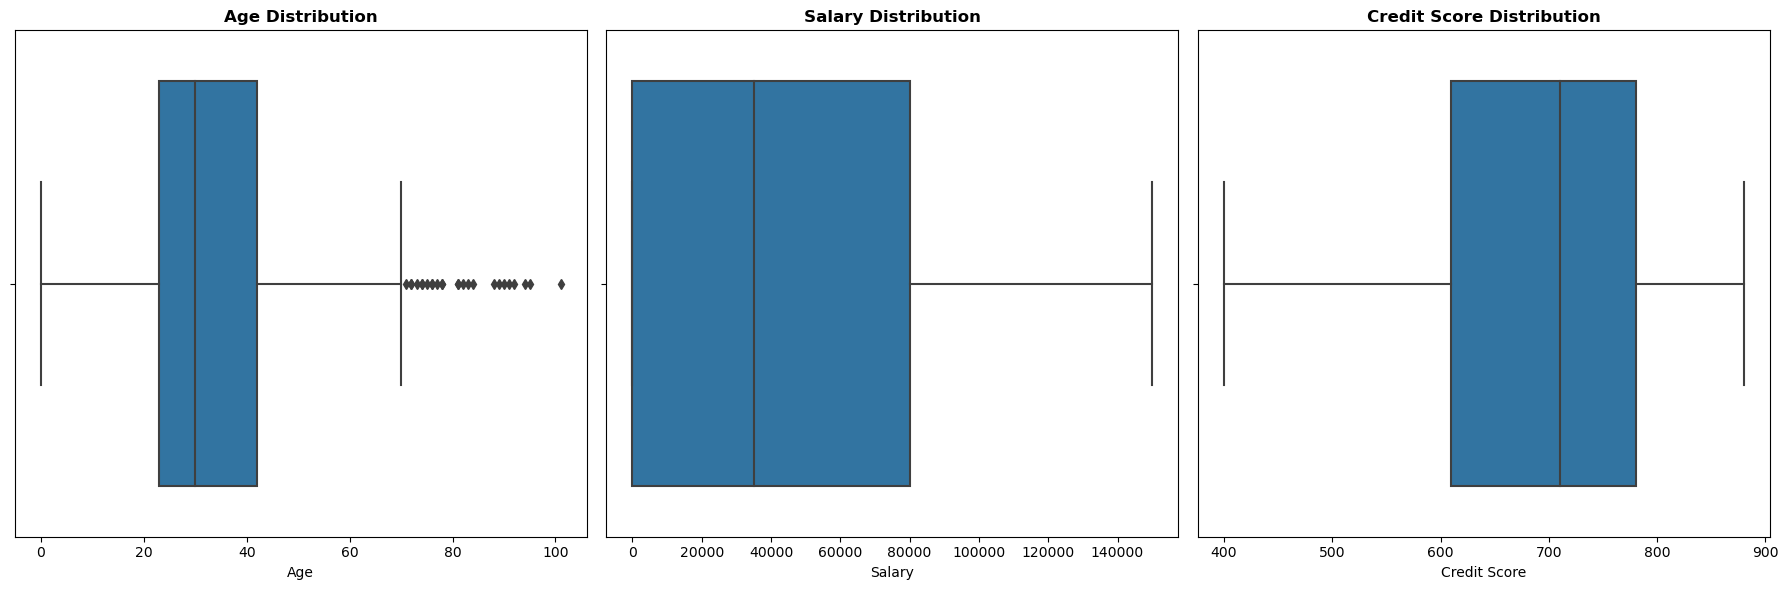

In [28]:

# Create a 1x3 subplot to visualize outliers for age, salary, and credit score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for 'age'
sns.boxplot(x=employment_health['age'], ax=axes[0])
axes[0].set_title('Age Distribution',fontweight='bold')
axes[0].set_xlabel('Age')

# Box plot for 'salary'
sns.boxplot(x=employment_health['salary'], ax=axes[1])
axes[1].set_title('Salary Distribution',fontweight='bold')
axes[1].set_xlabel('Salary')

# Box plot for 'credit_score'
sns.boxplot(x=employment_health['credit_score'], ax=axes[2])
axes[2].set_title('Credit Score Distribution',fontweight='bold')
axes[2].set_xlabel('Credit Score')


# Display the plots
plt.tight_layout()
plt.show()


From the above:

age: With a median age of 30 years, older Indivuduals are the outliers as their age is significantly above the 75%(percentile) 41 years

There are no outliers in salary and credit_score distribution.

##### Find Correlation

Correlation Matrix:
                   age    salary  credit_score
age           1.000000  0.018584     -0.044685
salary        0.018584  1.000000      0.651599
credit_score -0.044685  0.651599      1.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


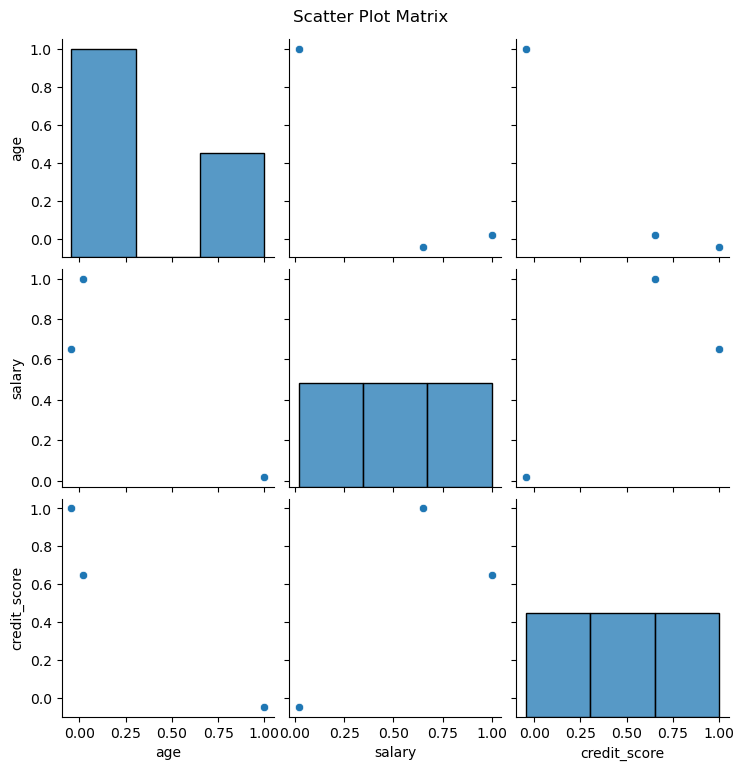

In [29]:
# Correlation analysis

corr_matrix = employment_health[['age','salary','credit_score']].corr()

print('Correlation Matrix:')
print(corr_matrix)


#Visualization (reate a scatterplot matrix)
sns.pairplot(corr_matrix)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()




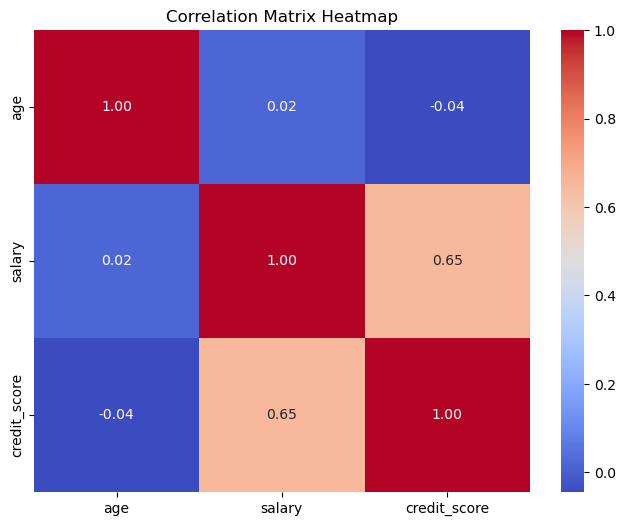

In [30]:
# Heatmap of the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()



There is no correlation between age and _credit_score
There is a week correlation between age and salary
There is a strong correlation between 'salary' and 'credit_score'

In [31]:
employment_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1656 non-null   object
 1   age                1596 non-null   Int64 
 2   city               1656 non-null   object
 3   education          1656 non-null   object
 4   employment_status  1656 non-null   object
 5   salary             1647 non-null   Int64 
 6   health_condition   1656 non-null   object
 7   credit_score       1143 non-null   Int64 
dtypes: Int64(3), object(5)
memory usage: 108.5+ KB


### Since there are few null values in 'age', 'salary', and 'credit_score column' we will fill them with median value of each variable respectively.

In [32]:
employment_health['age'] = employment_health['age'].fillna(employment_health['age'].median())
employment_health['salary'] = employment_health['salary'].fillna(employment_health['salary'].median())
employment_health['credit_score'] = employment_health['credit_score'].fillna(employment_health['credit_score'].median())



#The median is used because it is a nbetter measure than mean when daeling with outliers because:
#It is more roboust to ouliers because it focuses on middle values
#It is less affected by skewed distributions
#It provides a better representation of the typical valuein a datasese expeciallywhen utliers are present

In [33]:
employment_health.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1656 non-null   object
 1   age                1656 non-null   Int64 
 2   city               1656 non-null   object
 3   education          1656 non-null   object
 4   employment_status  1656 non-null   object
 5   salary             1656 non-null   Int64 
 6   health_condition   1656 non-null   object
 7   credit_score       1656 non-null   Int64 
dtypes: Int64(3), object(5)
memory usage: 108.5+ KB


In [34]:
employment_health.head()

,name,age,city,education,employment_status,salary,health_condition,credit_score
0,GARCIA JUAN,78,Albuquerque,Bachelor's,Employed(Full-time),80000,Good,720
1,MONTOYA CAMERON,17,Albuquerque,Associate,Unemployed,0,Excellent,710
2,SATTERFIELD VIVIANA,15,Albuquerque,PhD,Self-employed,120000,Poor,550
3,MENDIOLA CARLOS,32,Albuquerque,High School,Employed(Full-time),45000,Excellent,800
4,MULA VIVIAN,72,Albuquerque,Master's,Retired,50000,Average,680


### Pre-Processing

#### Create a categorized credit score column based on FICO system which isthe most widely used credit score system used in the USA

In [35]:
# Define the function to categorize credit scores based on the FICO system
def categorize_credit_score(score):
    if pd.isna(score):
        return 'Unspecified'  # Handle NaN values
    elif score >= 300 and score <= 579:
        return 'Poor'
    elif score >= 580 and score <= 669:
        return 'Fair'
    elif score >= 670 and score <= 739:
        return 'Good'
    elif score >= 740 and score <= 799:
        return 'Very Good'
    elif score >= 800 and score <= 850:
        return 'Excellent'
    else:
        return 'Unspecified'  # For scores outside the FICO range or invalid scores

# Apply the function to create a new categorical column
employment_health['credit_score_category'] = employment_health['credit_score'].apply(categorize_credit_score)

# Display the first few rows of the updated dataset
print(employment_health[['credit_score', 'credit_score_category']].head())


   credit_score credit_score_category
0           720                  Good
1           710                  Good
2           550                  Poor
3           800             Excellent
4           680                  Good


In [36]:
employment_health.head()

,name,age,city,education,employment_status,salary,health_condition,credit_score,credit_score_category
0,GARCIA JUAN,78,Albuquerque,Bachelor's,Employed(Full-time),80000,Good,720,Good
1,MONTOYA CAMERON,17,Albuquerque,Associate,Unemployed,0,Excellent,710,Good
2,SATTERFIELD VIVIANA,15,Albuquerque,PhD,Self-employed,120000,Poor,550,Poor
3,MENDIOLA CARLOS,32,Albuquerque,High School,Employed(Full-time),45000,Excellent,800,Excellent
4,MULA VIVIAN,72,Albuquerque,Master's,Retired,50000,Average,680,Good


In [37]:
employment_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   1656 non-null   object
 1   age                    1656 non-null   Int64 
 2   city                   1656 non-null   object
 3   education              1656 non-null   object
 4   employment_status      1656 non-null   object
 5   salary                 1656 non-null   Int64 
 6   health_condition       1656 non-null   object
 7   credit_score           1656 non-null   Int64 
 8   credit_score_category  1656 non-null   object
dtypes: Int64(3), object(6)
memory usage: 121.4+ KB


#### We have a clean and complete dataset with the right data type format